In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
data = pd.read_csv('/content/ML PROJECT DATA SET 4.CSV')
data.head()


,TYPE,VALUE DATE,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,03-Jan-17,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,PAYMENT,16-Jan-17,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,TRANSFER,17-Jan-17,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0
3,CASH_OUT,18-Jan-17,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0
4,PAYMENT,19-Jan-17,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
data.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.00000
mean,1.212602e+05,1.069053e+06,1.099185e+06,6.586228e+05,1.230104e+06,0.04875
std,2.561308e+05,2.277015e+06,2.330267e+06,2.056917e+06,3.537992e+06,0.21548
min,8.730000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000
25%,4.571125e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000
50%,1.561692e+04,1.886884e+04,9.114660e+03,4.152850e+04,0.000000e+00,0.00000
75%,1.495832e+05,2.210285e+05,2.558799e+05,4.554051e+05,5.665873e+05,0.00000
max,2.545478e+06,9.716462e+06,9.987287e+06,1.700000e+07,1.920000e+07,1.00000


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TYPE            800 non-null    object 
 1   VALUE DATE      800 non-null    object 
 2   amount          800 non-null    float64
 3   nameOrig        800 non-null    object 
 4   oldbalanceOrg   800 non-null    float64
 5   newbalanceOrig  800 non-null    float64
 6   nameDest        800 non-null    object 
 7   oldbalanceDest  800 non-null    float64
 8   newbalanceDest  800 non-null    float64
 9   isFraud         800 non-null    int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 62.6+ KB


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TYPE            800 non-null    object 
 1   VALUE DATE      800 non-null    object 
 2   amount          800 non-null    float64
 3   nameOrig        800 non-null    object 
 4   oldbalanceOrg   800 non-null    float64
 5   newbalanceOrig  800 non-null    float64
 6   nameDest        800 non-null    object 
 7   oldbalanceDest  800 non-null    float64
 8   newbalanceDest  800 non-null    float64
 9   isFraud         800 non-null    int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 62.6+ KB


In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 4
Integer variables: 1
Float variables: 5


<Axes: xlabel='TYPE', ylabel='count'>

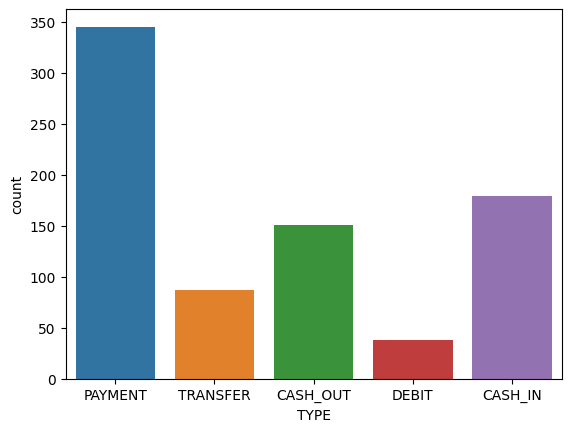

In [ ]:
sns.countplot(x='TYPE', data=data)


In [ ]:
#We can also use the bar plot for analyzing Type and amount column simultaneously.

<Axes: xlabel='TYPE', ylabel='amount'>

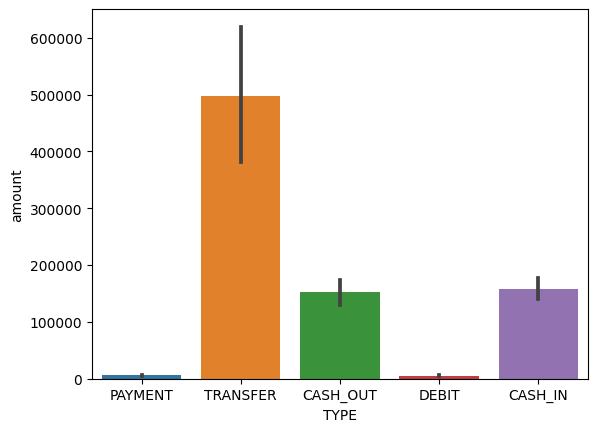

In [ ]:
sns.barplot(x='TYPE', y='amount', data=data)


In [ ]:
# Both the graph  type cash_out and transfer are maximum in count and as well as in amount. 
#check the distribution of data among both the prediction values.

In [ ]:
data['isFraud'].value_counts()


0    761
1     39
Name: isFraud, dtype: int64

In [ ]:
#check the distribution of data among both the prediction values.

<Axes: xlabel='isFraud', ylabel='count'>

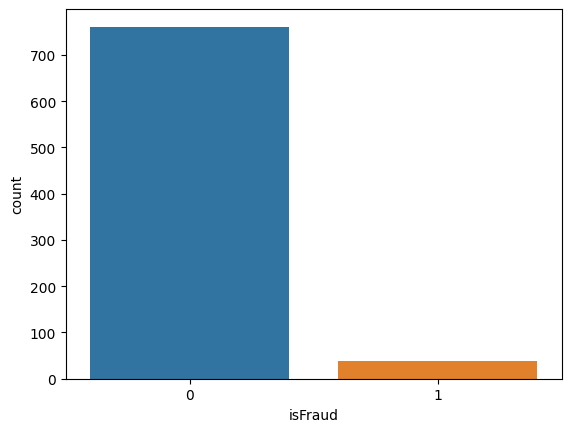

In [ ]:
sns.countplot(x='isFraud', data=data)


In [ ]:
#Data Preprocessing


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#1.Encoding of Type column

In [ ]:
type_new = pd.get_dummies(data['TYPE'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()



,TYPE,VALUE DATE,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,PAYMENT,03-Jan-17,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,PAYMENT,16-Jan-17,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,TRANSFER,17-Jan-17,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,0,1
3,CASH_OUT,18-Jan-17,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1,0,0,0
4,PAYMENT,19-Jan-17,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


In [ ]:
#2.Dropping irrelevant columns like nameOrig, nameDest


In [ ]:
X = data_new.drop(['isFraud', 'TYPE', 'nameOrig', 'nameDest', 'VALUE DATE'], axis=1)
Y = data_new['isFraud']


In [ ]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,170136.0,160296.36,0.00,0.00,0,0,1,0
1,1864.28,21249.0,19384.72,0.00,0.00,0,0,1,0
2,181.00,181.0,0.00,0.00,0.00,0,0,0,1
3,181.00,181.0,0.00,21182.00,0.00,1,0,0,0
4,11668.14,41554.0,29885.86,0.00,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...
795,639378.37,0.0,0.00,753824.15,3420103.09,0,0,0,1
796,34390.85,0.0,0.00,90214.97,66575.50,0,0,0,1
797,1867849.02,0.0,0.00,2271538.11,5515763.34,0,0,0,1
798,1193410.46,0.0,0.00,16500000.00,19200000.00,0,0,0,1


In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: isFraud, Length: 800, dtype: int64

In [ ]:
#check the shape of extracted data

In [ ]:
X.shape, Y.shape


((800, 9), (800,))

In [ ]:
#split the data into 2 parts : Training and Testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, Y, test_size=0.3, random_state=42)


In [ ]:
#model Training

In [ ]:
#As the prediction is a classification problem so the models we will be using are :

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train) # training Model

LogisticRegression()

In [ ]:
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import (accuracy_score,confusion_matrix)

In [ ]:
accuracy_score(y_test,pred)

0.9208333333333333

In [ ]:
confusion_matrix(y_test,pred)

array([[218,  10],
       [  9,   3]])